In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input

#from google.colab import drive 
#drive.mount('/content/gdrive')

In [2]:
PATH = './data/'

# show results
import matplotlib
import matplotlib.pyplot as plt

# create a template
side = 360
template = kimage.load_img(PATH+'template.jpg', target_size=(side, side))

plt.figure(figsize=(4,4))
plt.imshow(template)

FileNotFoundError: [Errno 2] No such file or directory: './template.jpg'

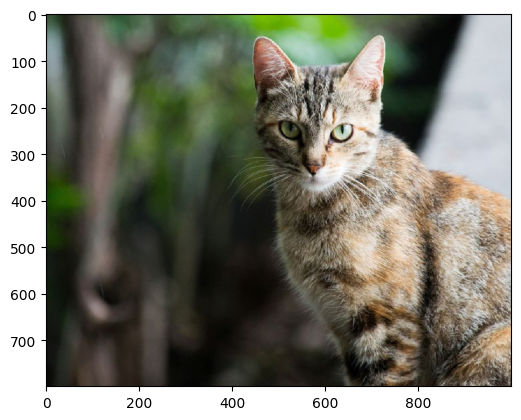

In [ ]:
height = 800
width  = 1000

# load an image
image = kimage.load_img(PATH+'image2.jpg', target_size=(height, width))

plt.figure(figsize=(6,6))
plt.imshow(image)

In [ ]:
model = tf.keras.applications.VGG16(include_top=False, 
                                    weights='imagenet', 
                                    input_shape=(None, None, 3))
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
template_dim = np.expand_dims(template, axis=0)
image_dim    = np.expand_dims(image, axis=0)

print(template_dim.shape)
print(image_dim.shape)

template_feature = model.predict(template_dim)
image_feature    = model.predict(image_dim)

print(template_feature.shape)
print(image_feature.shape)

(1, 360, 360, 3)
(1, 800, 1000, 3)
1/1 [==============================] - 3s 3s/step
(1, 11, 11, 512)
(1, 25, 31, 512)


In [ ]:
side_fm = 11
height_fm = 25
width_fm  = 31

sim_data = []
for i in range(height_fm-side_fm+1):
  for j in range(width_fm-side_fm+1):
    patch = image_feature[0,i:i+side_fm,j:j+side_fm,:]
    #sim = cosine_similarity(np.reshape(patch, (1, -1)), np.reshape(template_feature, (1,-1)))
    sim = np.sum(np.absolute(np.reshape(patch, (1, -1)), np.reshape(template_feature, (1,-1))))
    sim_data.append((sim, i, j))

print(len(sim_data))

315


In [ ]:
def getKey(item):
    return item[0]

sim_data_sorted = sorted(sim_data, key=getKey, reverse=True)
print(sim_data_sorted[:3])

[(203366.9, 2, 13), (202632.31, 2, 14), (201809.22, 1, 13)]


<Figure size 1600x1600 with 0 Axes>

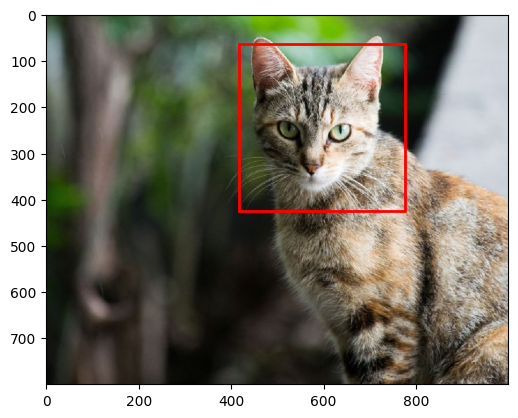

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

#im = Image.open(PATH+'image3.jpg')
im = kimage.load_img(PATH+'image2.jpg', target_size=(800, 1000))

plt.figure(figsize=(16,16))
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
scale_height = height//height_fm
scale_width  = width//width_fm
for i in range(1): 
  rect = patches.Rectangle((sim_data_sorted[i][2]*scale_width, sim_data_sorted[i][1]*scale_height), 
                           side, side, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()